<a href="https://colab.research.google.com/github/rowizu/MachineLearningExamples/blob/master/ElectrictyConsumptionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Building the dataset

Dataset imported from kaggle website that it's partailly matching the requested data structure. 

Dataset name: Hourly Energy Consumption

It contains over 10 years of hourly energy consumption data from [PJM ](https://www.pjm.com/)in Megawatts.

License: Pubic Domain. 

9 Accounts that provided there energy consumption data were named in strings so i assigned them ids as following: 

AEP: American Electric Power (ID:1)

Comed: Commonwealth Edison(ID:2)

DAYTON: Dayton Power & Light (ID:3)

DEOK: DEOK (ID:4)

DOM: Dominion Virginia Power (ID:5)

EKPC: East Kentucky Power Cooperative (ID:6)

FE: FirstEnergy (ID:7)

DUQ: Duquesne Light Co. (ID:8)

NI: Northern Hub (ID:9)


[Dataset](https://www.kaggle.com/robikscube/hourly-energy-consumption/download)

###Importing required library to load the data

In [245]:
import pandas as pd 
import numpy as np 
import io

##Loading the dataset

In [246]:
#Uploading the dataset compressed file
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
#decompressing the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

In [ ]:
#Create the dataframes and reading the csv files 
df1 = pd.read_csv('AEP_hourly.csv')
df2= pd.read_csv('COMED_hourly.csv')
df3= pd.read_csv('DAYTON_hourly.csv')
df4= pd.read_csv('DEOK_hourly.csv')
df5= pd.read_csv('DOM_hourly.csv')
df6= pd.read_csv('EKPC_hourly.csv')
df7= pd.read_csv('FE_hourly.csv') 
df8= pd.read_csv('DUQ_hourly.csv')
df9= pd.read_csv('NI_hourly.csv')



In [ ]:
#Renaming the power consumption column to a unified name in all of the dataframes
df1.rename(columns={df1.columns[1]: 'consumption_value'}, inplace=True)
df2.rename(columns={df2.columns[1]: 'consumption_value'}, inplace=True)
df3.rename(columns={df3.columns[1]: 'consumption_value'}, inplace=True)
df4.rename(columns={df4.columns[1]: 'consumption_value'}, inplace=True)
df5.rename(columns={df5.columns[1]: 'consumption_value'}, inplace=True)
df6.rename(columns={df6.columns[1]: 'consumption_value'}, inplace=True)
df7.rename(columns={df7.columns[1]: 'consumption_value'}, inplace=True)
df8.rename(columns={df8.columns[1]: 'consumption_value'}, inplace=True)
df9.rename(columns={df9.columns[1]: 'consumption_value'}, inplace=True)


In [ ]:
#Assighning the account numbers and adding the column to the data frames
df1['account_number'] = 1
df2['account_number'] = 2
df3['account_number'] = 3
df4['account_number'] = 4
df5['account_number'] = 5
df6['account_number'] = 6
df7['account_number'] = 7
df8['account_number'] = 8
df9['account_number'] = 9


As there is no meter reading column provided with the data, i assumed meter was installed the first date that the data was provided by each account, and calculated the cumulatie sum of power consumption.

In [ ]:
# A function to derive a meter reading attribute from the power consumption value
def add_meterReading(dataframe):
  dataframe= dataframe.sort_values(by=['Datetime'])
  dataframe.set_index('Datetime')
  dataframe['meter_reading'] = dataframe.consumption_value.cumsum()
  return dataframe

In [ ]:
# Adding the columns to the dataframes
df1=add_meterReading(df1)
df2=add_meterReading(df2)
df3=add_meterReading(df3)
df4=add_meterReading(df4)
df5=add_meterReading(df5)
df6=add_meterReading(df6)
df7=add_meterReading(df7)
df8=add_meterReading(df8)
df9=add_meterReading(df9)


In [321]:
#concating the dataframes 
df=pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9])

In [322]:
#Checking missing values
pd.isna(df)

,Datetime,consumption_value,account_number,meter_reading
2183,False,False,False,False
2184,False,False,False,False
2185,False,False,False,False
2186,False,False,False,False
2187,False,False,False,False
...,...,...,...,...
49712,False,False,False,False
49713,False,False,False,False
49714,False,False,False,False
49715,False,False,False,False


In [323]:
#Seperating the Hours from date column 
df["Datetime"] = pd.to_datetime(df["Datetime"])
df["consumptionTime"] = df["Datetime"].dt.hour
df["consumptionDate"] = df["Datetime"].dt.date


In [324]:
#dropping the datetime column 
df=df.drop(["Datetime"],axis=1)

In [325]:
#Now the data is exactly followig the provided structure 
df

,consumption_value,account_number,meter_reading,consumptionTime,consumptionDate
2183,12379.0,1,12379.0,1,2004-10-01
2184,11935.0,1,24314.0,2,2004-10-01
2185,11692.0,1,36006.0,3,2004-10-01
2186,11597.0,1,47603.0,4,2004-10-01
2187,11681.0,1,59284.0,5,2004-10-01
...,...,...,...,...,...
49712,11585.0,9,683920747.0,20,2010-12-31
49713,11243.0,9,683931990.0,21,2010-12-31
49714,10825.0,9,683942815.0,22,2010-12-31
49715,10511.0,9,683953326.0,23,2010-12-31


#Exploratory Anaysis 

 ### Consumption Value Histogram and Boxplot


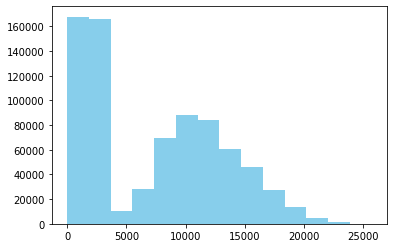

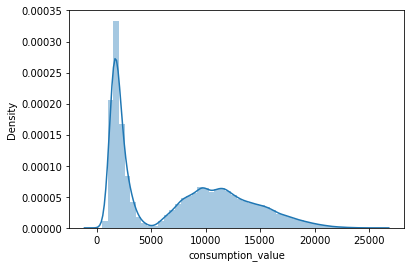

In [326]:
#importing the required libraries and ignore warnings
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#Using matplotlib
plt.hist(df['consumption_value'], bins=14, color='SkyBlue')
plt.show()
#using seaborn
sns.distplot(df['consumption_value'])


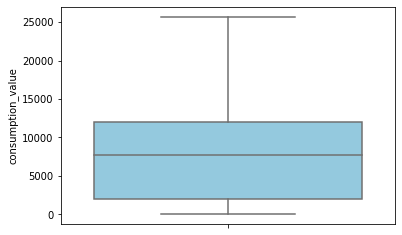

In [327]:
#Boxplot for the spread measure of price variable
sns.boxplot(y=df['consumption_value'], color='SkyBlue')

## Exploring the Categorical values

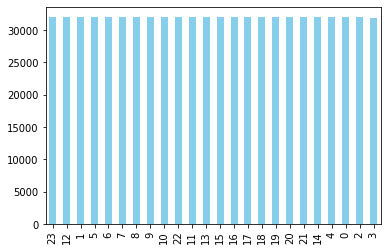

In [328]:
df['consumptionTime'].value_counts().plot(kind='bar', color='SkyBlue')

The hours frequency in our dataset are balanced 

As we have a limited features in our dataset, a derived features will help.

We can derive a weather attribute from the months data

In [329]:
#Splitting the months and days into seperated columns
df["consumptionDate"] = pd.to_datetime(df["consumptionDate"])
df["consumptionMonth"] = df["consumptionDate"].dt.month
df["consumptionDay"] = df["consumptionDate"].dt.day


In [330]:
df["consumptionYear"] = df["consumptionDate"].dt.year

In [331]:
 #Monday=0, Sunday=6.
df['weekday'] = df["consumptionDate"].dt.weekday


In [332]:
#assigning seasons numbers:
#1:Winter, 2:Spring , 3:Summer, 4: Fall
df['season'] = df['consumptionMonth'].apply(lambda month_number: (month_number%12 + 3)//3)

In [333]:
df

,consumption_value,account_number,meter_reading,consumptionTime,consumptionDate,consumptionMonth,consumptionDay,consumptionYear,weekday,season
2183,12379.0,1,12379.0,1,2004-10-01,10,1,2004,4,4
2184,11935.0,1,24314.0,2,2004-10-01,10,1,2004,4,4
2185,11692.0,1,36006.0,3,2004-10-01,10,1,2004,4,4
2186,11597.0,1,47603.0,4,2004-10-01,10,1,2004,4,4
2187,11681.0,1,59284.0,5,2004-10-01,10,1,2004,4,4
...,...,...,...,...,...,...,...,...,...,...
49712,11585.0,9,683920747.0,20,2010-12-31,12,31,2010,4,1
49713,11243.0,9,683931990.0,21,2010-12-31,12,31,2010,4,1
49714,10825.0,9,683942815.0,22,2010-12-31,12,31,2010,4,1
49715,10511.0,9,683953326.0,23,2010-12-31,12,31,2010,4,1


In [334]:
#dropping the redundant column
df=df.drop(["consumptionDate"],axis=1)
df.head(10)

,consumption_value,account_number,meter_reading,consumptionTime,consumptionMonth,consumptionDay,consumptionYear,weekday,season
2183,12379.0,1,12379.0,1,10,1,2004,4,4
2184,11935.0,1,24314.0,2,10,1,2004,4,4
2185,11692.0,1,36006.0,3,10,1,2004,4,4
2186,11597.0,1,47603.0,4,10,1,2004,4,4
2187,11681.0,1,59284.0,5,10,1,2004,4,4
2188,12280.0,1,71564.0,6,10,1,2004,4,4
2189,13692.0,1,85256.0,7,10,1,2004,4,4
2190,14618.0,1,99874.0,8,10,1,2004,4,4
2191,14903.0,1,114777.0,9,10,1,2004,4,4
2192,15118.0,1,129895.0,10,10,1,2004,4,4


Consumption values vs. Time, day, month, season, day of week, and year.

<Figure size 2160x360 with 0 Axes>

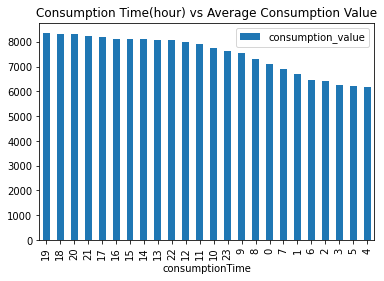

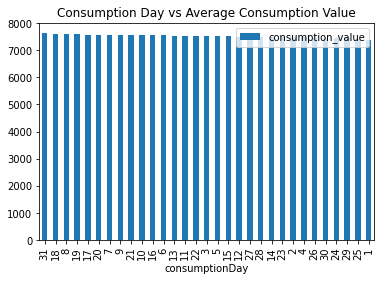

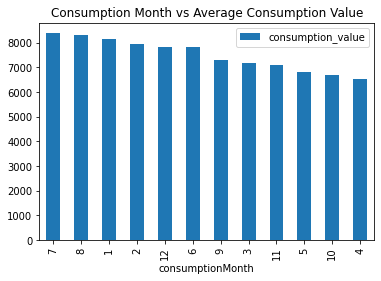

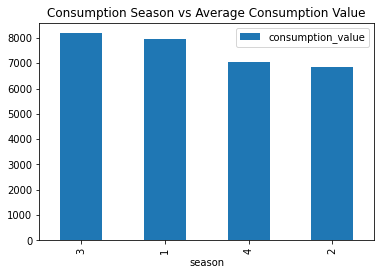

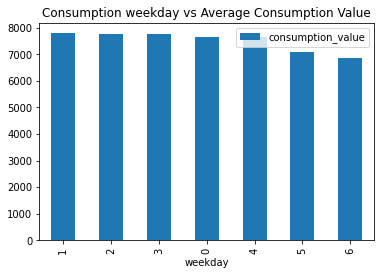

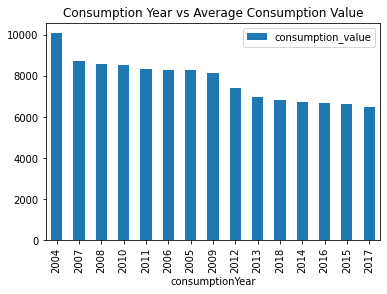

In [335]:

plt.figure(figsize=(30, 5))

dfTime = pd.DataFrame(df.groupby(['consumptionTime'])['consumption_value'].mean().sort_values(ascending = False))
dfTime.plot.bar()
plt.title('Consumption Time(hour) vs Average Consumption Value')
plt.show()

dfDay = pd.DataFrame(df.groupby(['consumptionDay'])['consumption_value'].mean().sort_values(ascending = False))
dfDay.plot.bar()
plt.title('Consumption Day vs Average Consumption Value')
plt.show()

dfMonth = pd.DataFrame(df.groupby(['consumptionMonth'])['consumption_value'].mean().sort_values(ascending = False))
dfMonth.plot.bar()
plt.title('Consumption Month vs Average Consumption Value')
plt.show()

dfSeason = pd.DataFrame(df.groupby(['season'])['consumption_value'].mean().sort_values(ascending = False))
dfSeason.plot.bar()
plt.title('Consumption Season vs Average Consumption Value')
plt.show()


dfWeekDay = pd.DataFrame(df.groupby(['weekday'])['consumption_value'].mean().sort_values(ascending = False))
dfWeekDay.plot.bar()
plt.title('Consumption weekday vs Average Consumption Value')
plt.show()

dfYear = pd.DataFrame(df.groupby(['consumptionYear'])['consumption_value'].mean().sort_values(ascending = False))
dfYear.plot.bar()
plt.title('Consumption Year vs Average Consumption Value')
plt.show()



The figure demonestrates 

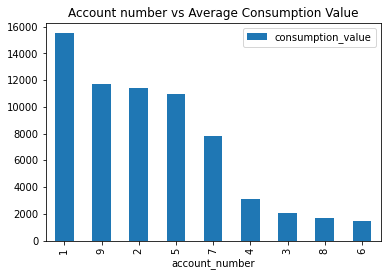

In [336]:
dfAccount= pd.DataFrame(df.groupby(['account_number'])['consumption_value'].mean().sort_values(ascending = False))
dfAccount.plot.bar()
plt.title('Account number vs Average Consumption Value')
plt.show()

As power consumption varies from account to another, we either find the sum to all of the energy consumption for all accounts and make a single model, or each account to has it's own model, but a solution in between woud be clustering the accounts and each cluster has it's own model. 

In [337]:
!pip install kneed

In [338]:
test_df = df.loc[df['consumptionYear'] >= 2017] 

In [339]:
#dropping consumption data of 2004 year
# Get names of indexes for which column Age has value 30
indexNames = df[ (df['consumptionYear'] <= 2005) | (df['consumptionYear'] >= 2017) ].index

# Delete these row indexes from dataFrame
dfCleaned=df.drop(indexNames , inplace=False)



In [340]:
dfCleaned

,consumption_value,account_number,meter_reading,consumptionTime,consumptionMonth,consumptionDay,consumptionYear,weekday,season
19699,14287.0,1,172261620.0,1,1,1,2006,6,1
19700,13932.0,1,172275552.0,2,1,1,2006,6,1
19701,13713.0,1,172289265.0,3,1,1,2006,6,1
19702,13656.0,1,172302921.0,4,1,1,2006,6,1
19703,13635.0,1,172316556.0,5,1,1,2006,6,1
...,...,...,...,...,...,...,...,...,...
23414,12895.0,9,377945852.0,20,12,31,2007,0,1
23415,12495.0,9,377958347.0,21,12,31,2007,0,1
23416,12075.0,9,377970422.0,22,12,31,2007,0,1
23417,11678.0,9,377982100.0,23,12,31,2007,0,1


In [341]:
test_df

,consumption_value,account_number,meter_reading,consumptionTime,consumptionMonth,consumptionDay,consumptionYear,weekday,season
98617,13240.0,1,1.674276e+09,0,1,1,2017,6,1
116114,12876.0,1,1.674289e+09,1,1,1,2017,6,1
116115,12591.0,1,1.674301e+09,2,1,1,2017,6,1
116116,12487.0,1,1.674314e+09,3,1,1,2017,6,1
116117,12369.0,1,1.674326e+09,4,1,1,2017,6,1
...,...,...,...,...,...,...,...,...,...
113952,1966.0,8,1.975051e+08,20,8,2,2018,3,3
113953,1944.0,8,1.975071e+08,21,8,2,2018,3,3
113954,1901.0,8,1.975090e+08,22,8,2,2018,3,3
113955,1789.0,8,1.975108e+08,23,8,2,2018,3,3


In [342]:
#import required librararies
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [343]:

#scaling the consumption value
float_array = dfCleaned['consumption_value'].values.astype(float)
float_array=float_array.reshape(-1, 1)
scaler = StandardScaler()
scaled_array =  scaler.fit_transform(float_array)


In [344]:
df_normalized = pd.DataFrame(scaled_array)
df_normalized

,0
0,1.188922
1,1.127311
2,1.089303
3,1.079411
4,1.075766
...,...
294376,0.947338
294377,0.877917
294378,0.805026
294379,0.736126


In [345]:
dfScaled=dfCleaned.join(df_normalized)

In [346]:
dfScaled

,consumption_value,account_number,meter_reading,consumptionTime,consumptionMonth,consumptionDay,consumptionYear,weekday,season,0
14637,15710.0,1,2.520880e+08,2,7,31,2006,0,3,1.505826
14637,8563.0,2,1.331314e+08,1,4,30,2012,0,2,1.505826
14637,2245.0,3,3.371942e+07,2,7,31,2006,0,3,1.505826
14637,2424.0,4,3.570426e+07,1,5,1,2013,2,2,1.505826
14637,9259.0,5,2.512913e+08,1,12,31,2007,0,1,1.505826
...,...,...,...,...,...,...,...,...,...,...
102292,1279.0,8,1.661181e+08,23,4,30,2016,5,2,-0.895257
102293,12608.0,1,1.619366e+09,3,7,30,2016,5,3,-0.857770
102293,1899.0,3,2.116169e+08,1,7,30,2016,5,3,-0.857770
102293,10369.0,5,1.017536e+09,0,1,2,2016,5,1,-0.857770


In [347]:
dfScaled.rename(columns={dfScaled.columns[9]: 'scaledConsumption_value'}, inplace=True)

In [348]:
dfScaled

,consumption_value,account_number,meter_reading,consumptionTime,consumptionMonth,consumptionDay,consumptionYear,weekday,season,scaledConsumption_value
14637,15710.0,1,2.520880e+08,2,7,31,2006,0,3,1.505826
14637,8563.0,2,1.331314e+08,1,4,30,2012,0,2,1.505826
14637,2245.0,3,3.371942e+07,2,7,31,2006,0,3,1.505826
14637,2424.0,4,3.570426e+07,1,5,1,2013,2,2,1.505826
14637,9259.0,5,2.512913e+08,1,12,31,2007,0,1,1.505826
...,...,...,...,...,...,...,...,...,...,...
102292,1279.0,8,1.661181e+08,23,4,30,2016,5,2,-0.895257
102293,12608.0,1,1.619366e+09,3,7,30,2016,5,3,-0.857770
102293,1899.0,3,2.116169e+08,1,7,30,2016,5,3,-0.857770
102293,10369.0,5,1.017536e+09,0,1,2,2016,5,1,-0.857770


###heatmap

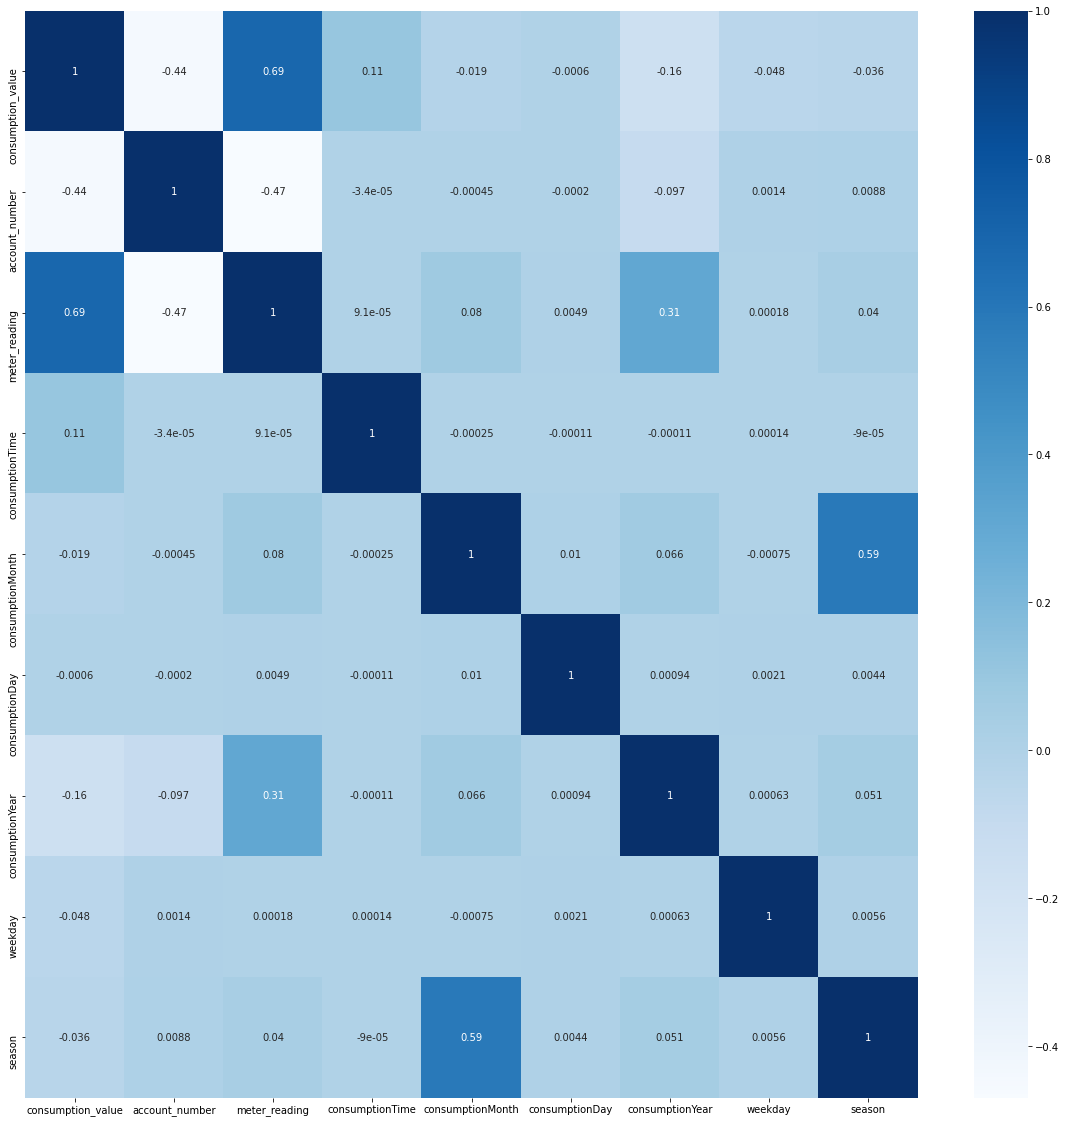

In [349]:
#Correlation calculator and heatmap Function
def correlations_heatmap(dset):
    """
    This function is to evaluate models
    """ 
    corrmat = dset.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(20,20))
    #plot heat map
    g=sns.heatmap(dset[top_corr_features].corr(),annot=True,cmap="Blues")
    return g
correlations_heatmap(dfCleaned)

In [350]:
#finding the mean consumption per hour for accounts 
dfgrouped=dfCleaned.groupby(['account_number', 'consumptionTime','season','weekday'], as_index=False).agg({'consumption_value':"mean"})



In [351]:
dfgrouped

,account_number,consumptionTime,season,weekday,consumption_value
0,1,0,1,0,15538.782051
1,1,0,1,1,16415.237500
2,1,0,1,2,16422.962025
3,1,0,1,3,16430.435897
4,1,0,1,4,16626.605263
...,...,...,...,...,...
6043,9,23,4,2,12291.269231
6044,9,23,4,3,12250.307692
6045,9,23,4,4,12177.846154
6046,9,23,4,5,10974.730769


In [352]:
X=dfgrouped.iloc[:,[1,4]].values

<function matplotlib.pyplot.show>

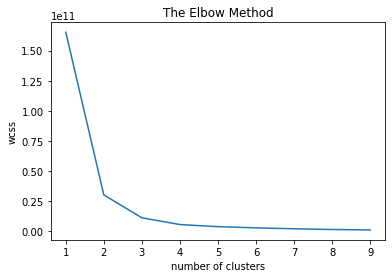

In [353]:
# A list holds the Sum Squared Error values for each k
wcss = []
for k in range(1, 10):
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 10),wcss)
plt.title("The Elbow Method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show

In [354]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(X)

In [355]:
print(y_kmeans)

[2 2 2 ... 2 0 0]


<function matplotlib.pyplot.show>

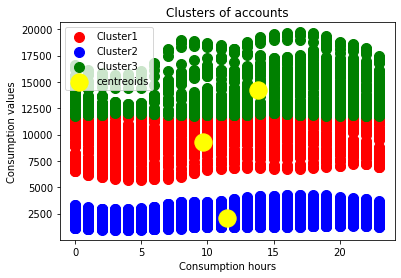

In [356]:
plt.scatter(X[y_kmeans== 0,0], X[y_kmeans == 0,1], s=100, c='red', label = 'Cluster1')
plt.scatter(X[y_kmeans== 1,0], X[y_kmeans == 1,1], s=100, c='blue', label = 'Cluster2')
plt.scatter(X[y_kmeans== 2,0], X[y_kmeans == 2,1], s=100, c='green', label = 'Cluster3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='centreoids')
plt.title("Clusters of accounts")
plt.xlabel("Consumption hours")
plt.ylabel("Consumption values")
plt.legend()
plt.show

In [357]:
dfgrouped.head(20)

,account_number,consumptionTime,season,weekday,consumption_value
0,1,0,1,0,15538.782051
1,1,0,1,1,16415.237500
2,1,0,1,2,16422.962025
3,1,0,1,3,16430.435897
4,1,0,1,4,16626.605263
5,1,0,1,5,16234.653333
6,1,0,1,6,15406.743243
7,1,0,2,0,13288.461538
8,1,0,2,1,14078.474359
9,1,0,2,2,14158.797468


In [358]:
cluster_number = pd.DataFrame(y_kmeans)
cluster_number

,0
0,2
1,2
2,2
3,2
4,2
...,...
6043,2
6044,2
6045,2
6046,0


In [359]:
dfgrouped=dfgrouped.join(cluster_number)

In [360]:
dfgrouped.rename(columns={dfgrouped.columns[5]: 'cluster_number'}, inplace=True)
dfgrouped

,account_number,consumptionTime,season,weekday,consumption_value,cluster_number
0,1,0,1,0,15538.782051,2
1,1,0,1,1,16415.237500,2
2,1,0,1,2,16422.962025,2
3,1,0,1,3,16430.435897,2
4,1,0,1,4,16626.605263,2
...,...,...,...,...,...,...
6043,9,23,4,2,12291.269231,2
6044,9,23,4,3,12250.307692,2
6045,9,23,4,4,12177.846154,2
6046,9,23,4,5,10974.730769,0


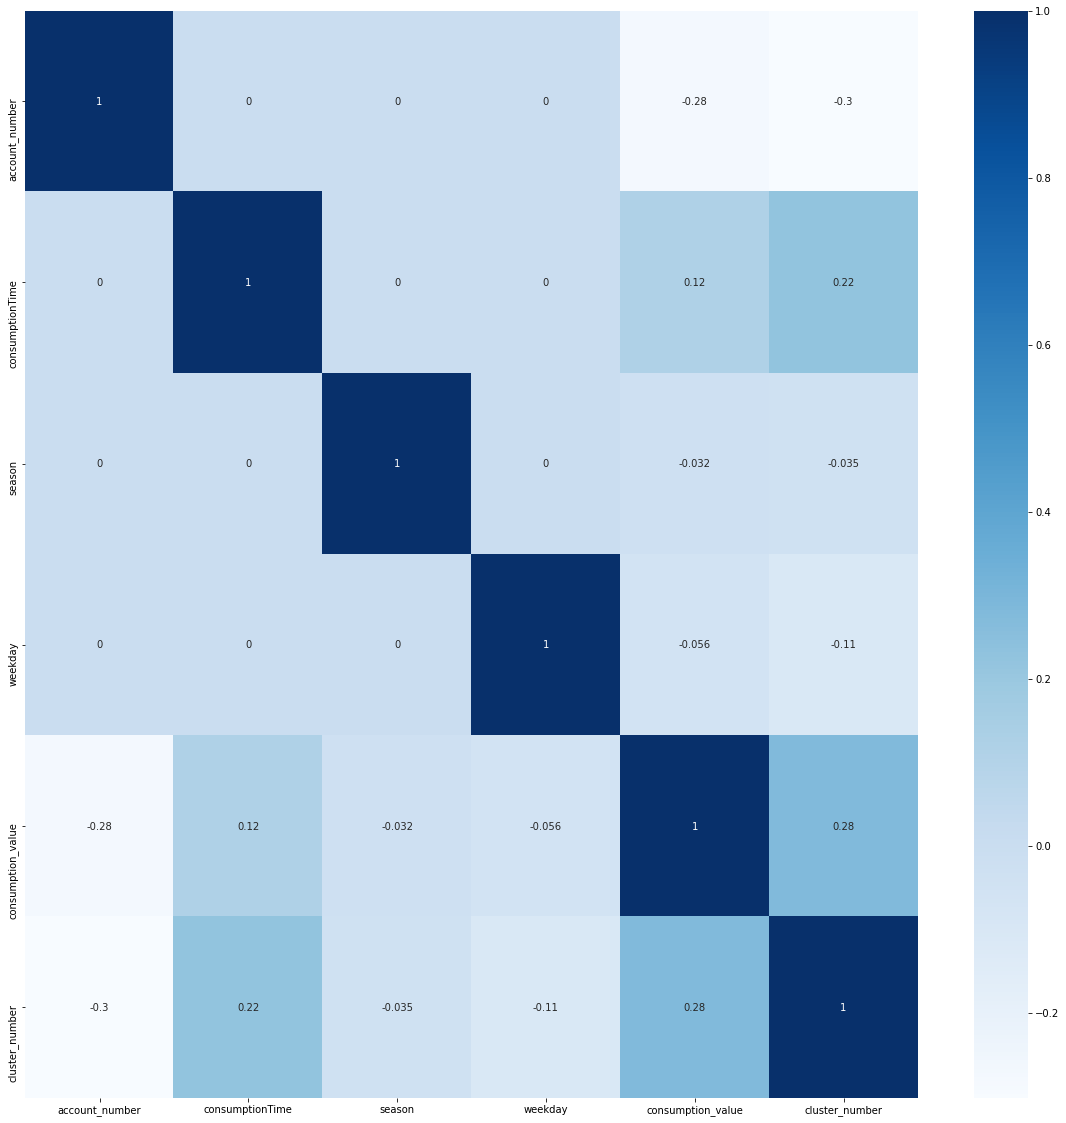

In [361]:
correlations_heatmap(dfgrouped)

##Assigning the variables

In [362]:
y=dfgrouped.iloc[:,4].values
x_dataset=dfgrouped
x_dataset.drop(['consumption_value','cluster_number'],axis=1,inplace=True)
x_dataset.info()
X=x_dataset.iloc[:,:].values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6048 entries, 0 to 6047
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   account_number   6048 non-null   int64
 1   consumptionTime  6048 non-null   int64
 2   season           6048 non-null   int64
 3   weekday          6048 non-null   int64
dtypes: int64(4)
memory usage: 396.2 KB


##Making sure that the independent varibales are stastically significant to predict the target variable

In [363]:
import statsmodels.api as sm
lr_model = sm.OLS(y, X).fit()
print(lr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.613
Model:                            OLS   Adj. R-squared (uncentered):              0.612
Method:                 Least Squares   F-statistic:                              2388.
Date:                Tue, 19 Jan 2021   Prob (F-statistic):                        0.00
Time:                        23:34:14   Log-Likelihood:                         -60780.
No. Observations:                6048   AIC:                                  1.216e+05
Df Residuals:                    6044   BIC:                                  1.216e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

##Splitting the dataset into the training set and test set

In [364]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Predicting the consumption value

###Fitting Polynomial Linear Regression to the training set

In [365]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [366]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(x_poly,y_train)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [367]:
y_pred=lin_reg2.predict(poly_reg.fit_transform(X_test))

In [368]:
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
def evaluate(name,ytest,ypred):
    """
    This function is to evaluate models
    """
    r=r2_score(ytest, ypred)*100
    mse=mean_squared_error(ytest, ypred)
    mae=mean_absolute_error(ytest, ypred)
    rmse=sqrt(mean_absolute_error(ytest, ypred))
    actual, pred = np.array(ytest), np.array(ypred)
    mparray=(np.abs(actual - pred) / actual)*100
    mape=np.mean(mparray)
    print("The " + name + "\n R2_Score: %.2f%%"% r 
          +" \n Mean Squared Error is %.2f"% mse +
          " \n Mean Absolute Error is %.2f"% mae+ 
          " \n Mean Absolute Percentage Error is %.2f%%"% mape+
          " \n and root mean squared error is %.2f"% rmse+'\n')

In [369]:
evaluate('Polynomial Linear Regression', y_test, y_pred)

The Polynomial Linear Regression
 R2_Score: 60.97% 
 Mean Squared Error is 11349274.17 
 Mean Absolute Error is 3032.03 
 Mean Absolute Percentage Error is 90.34% 
 and root mean squared error is 55.06



##Decision Tree Regressor Model

In [370]:
from sklearn.tree import DecisionTreeRegressor
regressorDT = DecisionTreeRegressor()
regressorDT.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [371]:
y_predDT=regressorDT.predict(X_test)

In [372]:
evaluate('Decision Tree Regressor', y_test, y_predDT)

The Decision Tree Regressor
 R2_Score: 99.87% 
 Mean Squared Error is 36786.55 
 Mean Absolute Error is 109.97 
 Mean Absolute Percentage Error is 1.58% 
 and root mean squared error is 10.49



##K Nearest Neighbours Model

In [373]:
from sklearn.neighbors import KNeighborsRegressor
regressor3 = KNeighborsRegressor()
regressor3.fit(X_train, y_train)

y_pred3 = regressor3.predict(X_test)

evaluate('K Nearest Neighbors Model', y_test, y_pred3)

The K Nearest Neighbors Model
 R2_Score: 83.48% 
 Mean Squared Error is 4803468.22 
 Mean Absolute Error is 1795.43 
 Mean Absolute Percentage Error is 53.24% 
 and root mean squared error is 42.37



##Random Forest

In [374]:
from sklearn.ensemble import RandomForestRegressor
RF_SEED = 30

regressor1 = RandomForestRegressor(n_estimators=1000, random_state=RF_SEED)
regressor1.fit(X_train, y_train)

y_pred2 = regressor1.predict(X_test)

In [375]:
evaluate('Random Forest Regressor', y_test, y_pred2)

The Random Forest Regressor
 R2_Score: 99.92% 
 Mean Squared Error is 24086.72 
 Mean Absolute Error is 86.86 
 Mean Absolute Percentage Error is 1.23% 
 and root mean squared error is 9.32



#Processing the new test data for the model

In [376]:
#finding the mean consumption per hour for accounts 
dfgrouped_test=test_df.groupby(['account_number', 'consumptionTime','season','weekday'], as_index=False).agg({'consumption_value':"mean"})

In [377]:
dfgrouped_test

,account_number,consumptionTime,season,weekday,consumption_value
0,1,0,1,0,14659.181818
1,1,0,1,1,15057.818182
2,1,0,1,2,15084.142857
3,1,0,1,3,15417.900000
4,1,0,1,4,15604.666667
...,...,...,...,...,...
5371,8,23,4,2,1513.846154
5372,8,23,4,3,1433.000000
5373,8,23,4,4,1408.538462
5374,8,23,4,5,1388.384615


In [378]:
y2=dfgrouped_test.iloc[:,4].values
x_dataset2=dfgrouped_test
x_dataset2.drop(['consumption_value'],axis=1,inplace=True)
x_dataset2.info()
X2=x_dataset2.iloc[:,:].values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5376 entries, 0 to 5375
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   account_number   5376 non-null   int64
 1   consumptionTime  5376 non-null   int64
 2   season           5376 non-null   int64
 3   weekday          5376 non-null   int64
dtypes: int64(4)
memory usage: 210.0 KB


#Testing The New Data Points 

###Testing 2017 Data with Random Forest 

In [379]:
y2_pred2 = regressor1.predict(X2)

In [380]:
evaluate('Random_forest', y2, y2_pred2)

The Random_forest
 R2_Score: 99.46% 
 Mean Squared Error is 139498.92 
 Mean Absolute Error is 246.92 
 Mean Absolute Percentage Error is 3.93% 
 and root mean squared error is 15.71



<function matplotlib.pyplot.show>

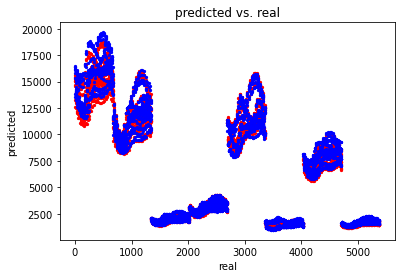

In [381]:
plt.scatter(range(1,5377),y2,s=5, c='red', label = 'real')
plt.scatter(range(1,5377),y2_pred2,s=5 , c='blue', label = 'predicted')
plt.title("predicted vs. real")
plt.xlabel("real")
plt.ylabel("predicted")
plt.show

###Testing 2017 Data with KNN

In [382]:
#Testing 2017 Data with knn 
y2_pred3 = regressor3.predict(X2)

In [383]:
y2_pred3

array([14259.9250037 , 14234.30742643, 15030.92229251, ...,
        3751.54594224,  1570.72395326,  4491.21794872])

In [384]:
evaluate('KNN', y2, y2_pred3)

The KNN
 R2_Score: 87.59% 
 Mean Squared Error is 3192327.71 
 Mean Absolute Error is 1418.03 
 Mean Absolute Percentage Error is 49.74% 
 and root mean squared error is 37.66



<function matplotlib.pyplot.show>

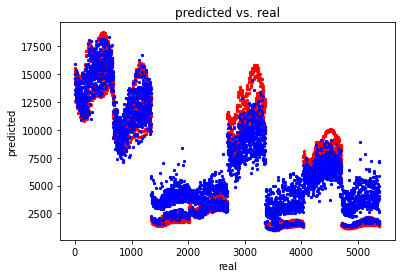

In [385]:
plt.scatter(range(1,5377),y2, s=5, c='red', label = 'real')
plt.scatter(range(1,5377),y2_pred3, s=5, c='blue', label = 'predicted')
plt.title("predicted vs. real")
plt.xlabel("real")
plt.ylabel("predicted")
plt.show

###Testing 2017 Data with Decesion Tree 

In [386]:
y2_predDT = regressorDT.predict(X2)

In [387]:
evaluate('Decision Tree', y2, y2_predDT)

The Decision Tree
 R2_Score: 99.45% 
 Mean Squared Error is 141936.59 
 Mean Absolute Error is 248.23 
 Mean Absolute Percentage Error is 3.94% 
 and root mean squared error is 15.76



<function matplotlib.pyplot.show>

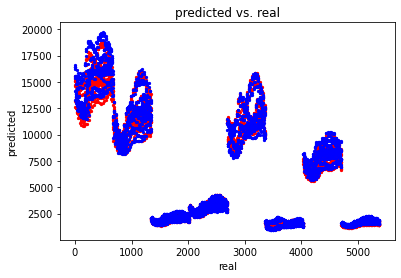

In [388]:
plt.scatter(range(1,5377),y2, s=5, c='red', label = 'real')
plt.scatter(range(1,5377),y2_predDT, s=5, c='blue', label = 'predicted')
plt.title("predicted vs. real")
plt.xlabel("real")
plt.ylabel("predicted")
plt.show

In [389]:
print("max: ",y2.max())

max:  18774.91304347826


In [390]:
print("Min: ",y2.min())

Min:  1022.9545454545455


#Preparing Data to be readable and saved 

In [391]:
df_predictedRD = pd.DataFrame(y2_pred2)
df_predictedDT = pd.DataFrame(y2_predDT)
df_predictedKNN = pd.DataFrame(y2_pred3)
df_real = pd.DataFrame(y2)
df_features=  pd.DataFrame(X2)
df_features.rename(columns={df_features.columns[0]: 'account_number'}, inplace=True)
df_features.rename(columns={df_features.columns[1]: 'consumption_hour'}, inplace=True)
df_features.rename(columns={df_features.columns[2]: 'season'}, inplace=True)
df_features.rename(columns={df_features.columns[3]: 'weekday'}, inplace=True)


In [392]:
df_joined= df_features.join(df_real)


In [393]:
df_joined.rename(columns={df_joined.columns[4]: 'real_avg_consumption_value'}, inplace=True)

In [399]:
df_RD= df_joined.join(df_predictedRD)
df_RD.rename(columns={df_RD.columns[5]: 'RandomForest_predicted'}, inplace=True)
df_DT= df_RD.join(df_predictedDT)
df_DT.rename(columns={df_DT.columns[6]: 'DecisionTree_predicted'}, inplace=True)
df_final= df_DT.join(df_predictedKNN)
df_final.rename(columns={df_final.columns[7]: 'KNN_predicted'}, inplace=True)

In [402]:
df_final['season'] = df_final['season'].map({1:'Winter', 2:'Spring', 3:'Summer',4:'Fall'}) 

df_final['weekday'] = df_final['weekday'].map({0:'Monday',1:'Tuesday', 2:'Wednesday', 3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}) 


In [403]:
df_final.real_avg_consumption_value = df_final.real_avg_consumption_value.round()
df_final.RandomForest_predicted = df_final.RandomForest_predicted.round()
df_final.DecisionTree_predicted = df_final.DecisionTree_predicted.round()
df_final.KNN_predicted = df_final.KNN_predicted.round()

In [416]:
df_final.sample(frac=1)

,account_number,consumption_hour,season,weekday,real_avg_consumption_value,RandomForest_predicted,DecisionTree_predicted,KNN_predicted
2698,5,0,Spring,Thursday,9542.0,9081.0,9062.0,8533.0
13,1,0,Spring,Sunday,12556.0,13226.0,12977.0,12819.0
4082,7,1,Fall,Tuesday,6566.0,6695.0,6768.0,5754.0
572,1,20,Spring,Saturday,13640.0,14111.0,14065.0,14882.0
1946,3,21,Summer,Monday,2474.0,2568.0,2574.0,4961.0
...,...,...,...,...,...,...,...,...
3921,6,20,Winter,Tuesday,1824.0,2022.0,2025.0,4136.0
1197,2,18,Fall,Monday,12382.0,12442.0,12361.0,11971.0
3956,6,21,Spring,Tuesday,1547.0,1431.0,1432.0,3602.0
3086,5,14,Winter,Sunday,11222.0,10836.0,10726.0,7501.0


In [405]:
df_final.to_csv('After2005ConsumptionPredictionDataResult.csv') 
files.download("After2005ConsumptionPredictionDataResult.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [406]:
AEP=df_final.loc[df_final['account_number'] == 1 & (df_final.season.str.contains('Summer'))& (df_final.weekday.str.contains('Friday'))]

Comed=df_final.loc[df_final['account_number'] == 2 & (df_final.season.str.contains('Summer'))& (df_final.weekday.str.contains('Monday'))]

DAYTON=df_final.loc[df_final['account_number'] == 3 & (df_final.season.str.contains('Summer'))& (df_final.weekday.str.contains('Sunday'))]

DEOK=df_final.loc[df_final['account_number'] == 4 &  (df_final.season.str.contains('Summer'))& (df_final.weekday.str.contains('Tuesday'))]

DOM=df_final.loc[df_final['account_number'] == 5 & (df_final.season.str.contains('Summer'))& (df_final.weekday.str.contains('Wednesday'))]

EKPC=df_final.loc[df_final['account_number'] == 6 & (df_final.season.str.contains('Summer'))& (df_final.weekday.str.contains('Thursday'))]

FE=df_final.loc[df_final['account_number'] == 7 & (df_final.season.str.contains('Summer'))& (df_final.weekday.str.contains('Saturday'))]

DUQ=df_final.loc[df_final['account_number'] == 8 & (df_final.season.str.contains('Summer'))& (df_final.weekday.str.contains('Friday'))]

NI=df_final.loc[df_final['account_number'] == 9 & (df_final.season.str.contains('Summer'))& (df_final.weekday.str.contains('Friday'))]


In [407]:
AEP

,account_number,consumption_hour,season,weekday,real_avg_consumption_value,RandomForest_predicted,DecisionTree_predicted,KNN_predicted
18,1,0,Summer,Friday,14850.0,15134.0,15442.0,14116.0
46,1,1,Summer,Friday,13838.0,14222.0,14292.0,13524.0
74,1,2,Summer,Friday,13111.0,13517.0,13530.0,13282.0
102,1,3,Summer,Friday,12635.0,12922.0,12773.0,12265.0
130,1,4,Summer,Friday,12396.0,12795.0,12773.0,11907.0
158,1,5,Summer,Friday,12450.0,12813.0,12781.0,11896.0
186,1,6,Summer,Friday,12896.0,13312.0,13258.0,12422.0
214,1,7,Summer,Friday,13608.0,14123.0,14032.0,12862.0
242,1,8,Summer,Friday,14322.0,14920.0,14795.0,14438.0
270,1,9,Summer,Friday,15097.0,15619.0,15565.0,14377.0


In [408]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

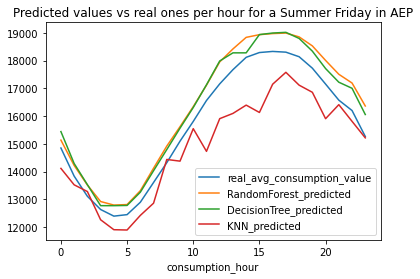

In [421]:
AEP.plot(x="consumption_hour", y=["real_avg_consumption_value","RandomForest_predicted" ,"DecisionTree_predicted","KNN_predicted"])
plt.title("Predicted values vs real ones per hour for a Summer Friday in AEP")
plt.show()

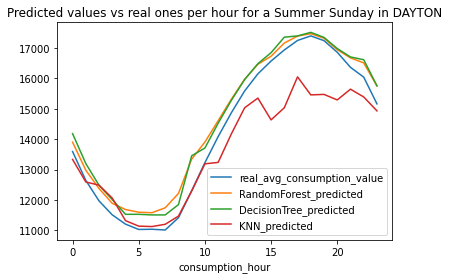

In [420]:
DAYTON.plot(x="consumption_hour", y=["real_avg_consumption_value","RandomForest_predicted" ,"DecisionTree_predicted","KNN_predicted"])
plt.title("Predicted values vs real ones per hour for a Summer Sunday in DAYTON")
plt.show()

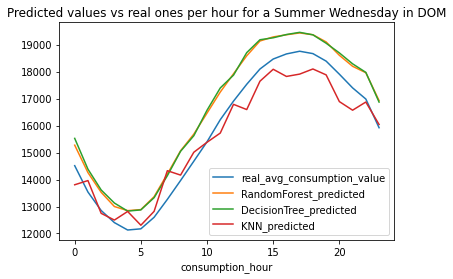

In [419]:
DOM.plot(x="consumption_hour", y=["real_avg_consumption_value","RandomForest_predicted" ,"DecisionTree_predicted","KNN_predicted"])
plt.title("Predicted values vs real ones per hour for a Summer Wednesday in DOM")
plt.show()

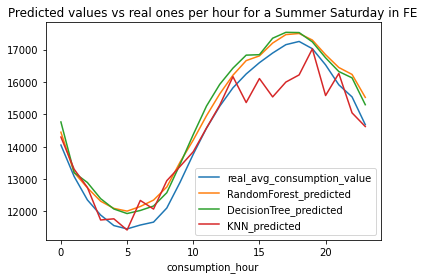

In [422]:
FE.plot(x="consumption_hour", y=["real_avg_consumption_value","RandomForest_predicted" ,"DecisionTree_predicted","KNN_predicted"])
plt.title("Predicted values vs real ones per hour for a Summer Saturday in FE")
plt.show()

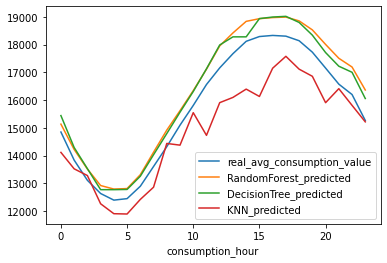

In [413]:
NI.plot(x="consumption_hour", y=["real_avg_consumption_value","RandomForest_predicted" ,"DecisionTree_predicted","KNN_predicted"])

plt.show()